Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()



Saving IMDb Movies India.csv to IMDb Movies India.csv


In [3]:
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Data Exploration

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


Data Preprocessing

In [20]:
df['Votes'] = df['Votes'].astype(str).str.replace(",", "", regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

df['Votes'] = df['Votes'].fillna(df['Votes'].mean())
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,222,5.841621,1938.520394,1031,1392,4672,2345
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,222,7.000000,8.000000,611,2536,4213,4297
2,#Homecoming,(2021),90 min,281,5.841621,1938.520394,4584,3017,2075,2725
3,#Yaaram,(2019),110 min,144,4.400000,35.000000,2579,2132,563,3359
4,...And Once Again,(2010),105 min,222,5.841621,1938.520394,3168,2350,2738,3391


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['Votes'] = df['Votes'].astype(str).str.replace(",", "", regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].mean())

df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

label_enc = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = label_enc.fit_transform(df[col].astype(str))

X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df['Rating']

scaler = StandardScaler()
X.loc[:, 'Votes'] = scaler.fit_transform(X[['Votes']])






Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (12407, 6)
Testing set size: (3102, 6)


Train Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


Evaluate Models

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Model: {model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



📊 Model: Linear Regression
MAE : 0.5767951192057706
MSE : 0.9439378646075428
RMSE: 0.9715646476727849
R²  : 0.01926228018704057

📊 Model: Random Forest
MAE : 0.4969819161583768
MSE : 0.8041000715225136
RMSE: 0.8967162714719265
R²  : 0.16455171445600902


Visualization

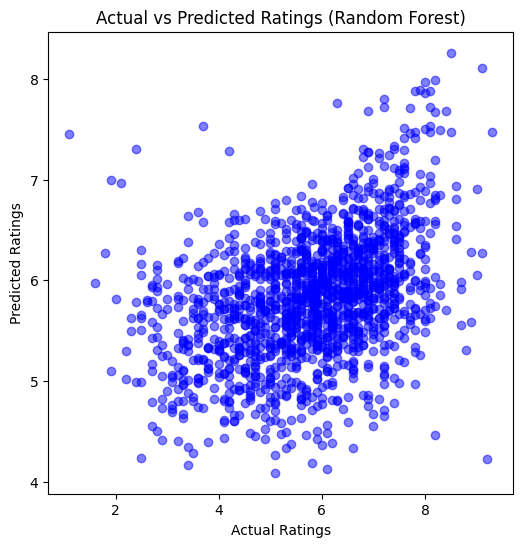

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Actual vs Predicted (Random Forest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()




/tmp/ipython-input-2616886630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


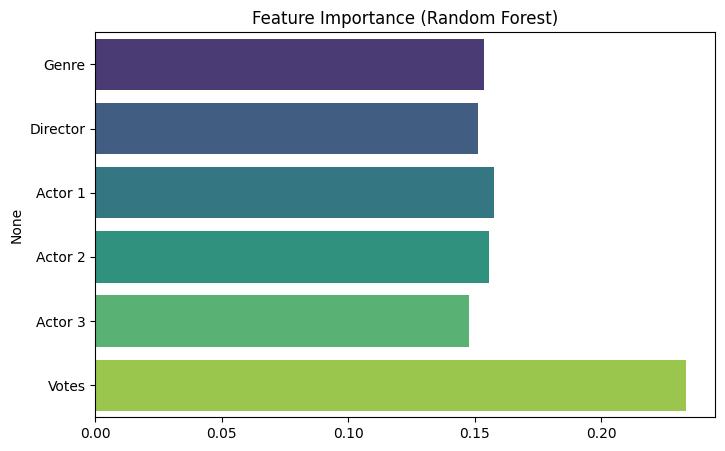

In [16]:
# Feature Importance (Random Forest)
importances = rf_reg.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

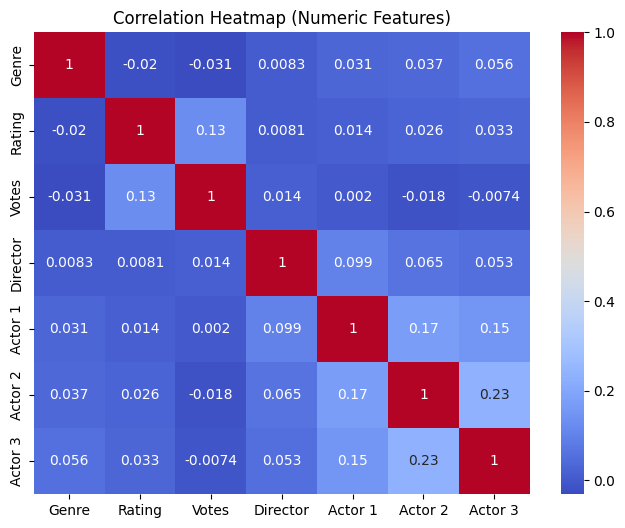

In [18]:
#Correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
